# ICS 434: DATA SCIENCE FUNDAMENTALS

## Cross-Validation

---

## Announcements

* Final Exam
  * **Thursday, May 11, 12:00 PM - 2:00 PM**
  * **<font color='red'>Location: POST 319 </font>** (Note that the exam location is different from the classroom.)
  * Open-book exam
  * You should bring your own computer. Be sure to fully charge the battery so that it runs for 2 hours.
  
  
* Course Evaluation
  * https://www.hawaii.edu/ces 
  * Extra credit will be given based on the completion rate:
    * 1 point if 80% $\leq$ completion rate $<$ 90%
    * 1.5 points if 90% $\leq$ completion rate
  * The system will be open until Friday, May 5

## Slide Credits

Most of these slides were taken from Mahdi Belcaid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# from sklearn.metrics import mean_squared_error

### Classification Trees for Regression (Categorical Features)

* For calssification, decisions to use a feature for a split are made based on the resulting homogeneity
  * A greedy approach mostly concerned with the short-term gains

<center><img src="images/11-12.png" width="400" >

<img src="https://raw.githubusercontent.com/blueberrymusic/Deep-Learning-A-Visual-Approach/main/Figures/Images/11-12.png" width="400" >

### Classification (or Decision) Trees

* We would like to group "reddish" circles together
  * Which value for radius should we use?

<img src="images/11-22.png" width="800">

<center><small>https://raw.githubusercontent.com/blueberrymusic/Deep-Learning-A-Visual-Approach</small>

### Classification Trees -- Cont'd

* We should select the value that produces the purest, or most homogeneous subsets (children) possible

* Various ways to measure the homoegeneity of the children
  * Entropy: measures the complexity, or how many bits it takes to encode some information
  * Compute the homogeneity as *Information Gain* between the parent and the children nodes
 
* The entropy for a node is simply:
$$E_{node} =- \sum_i^C p_i \mbox{log}_2(p_i)$$

* The combined entropy for a node is simply:
$$ E_{split} = nb\_nodes_{left} * E_{left} + nb\_nodes_{right} * E_{right} $$ 

* The gain is the difference between entropy before and after the split
$$
Gain = E_{root} - E_{split}
$$
* Other populat tests, such as the *Gini Impurity* or *Chi-square* can be used

### Classification Trees -- Cont'd

* We should select the value that produces the purest, or most homogeneous subsets (children) possible
* Various ways to measure the homoegeneity of the children
* Ex. The entropy for a node $T$ is simply:
$$E_{node} =- \sum_{i=1}^C p_i \mbox{log}_2(p_i)$$

* The combined entropy for a node $T$ is simply:
$$ E_{split} = \frac{|T_{left}|}{|T|} * E_{left} + \frac{|T_{right}|}{|T|} * E_{right} $$ 

* The gain is the difference between entropy before and after the split
$$
Gain = E_{node} - E_{split}
$$
* Other populat tests, such as the *Gini Impurity* or *Misclassfication Impurity* can be used


### Classification Trees (Categorical Features)


<center><img src="images/11-14.png" width="500">
    
<center><small>https://raw.githubusercontent.com/blueberrymusic/Deep-Learning-A-Visual-Approach</small>

### Classification Trees (Categorical Features) -- Cont'd

<center><img src="images/11-15.png" width="700">

<center><small>https://raw.githubusercontent.com/blueberrymusic/Deep-Learning-A-Visual-Approach</small>

### Classification Trees Example: Iris Dataset

<center><img src="images/iris.svg" width="700">
<center><small>https://scikit-learn.org/stable/modules/tree.html</small>

### Using a Decision Tree Regressor

* A powerful model, which is ideal for finding complex, non-linear relationships in the data
  * The details will be covered next week

### Decision Tree Regressor

* A powerful model, which is ideal for finding complex, non-linear relationships in the data

* In each node, the regression tree predicts a value instead of a class
  * Prediction: value of the leaf node

* An example: The following regression tree returns 0.782 for x1 = 0.1
<center><img src="images/decision_tree_regressor.png" alt="drawing" width="400"/>

<img src="images/data_X.png" alt="drawing" width="400"/>

<img src="images/regression_tree.png" alt="drawing" width="700"/>

In [2]:
import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv(url, header=None, na_values=['?'])
crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [3]:
import pandas as pd

# Data from https://archive-beta.ics.uci.edu/dataset/183/communities+and+crime

crime = pd.read_csv('data/communities.data', header=None, na_values=['?'])
crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [4]:
crime.shape

(1994, 128)

```
@attribute state numeric
@attribute county numeric
@attribute community numeric
@attribute communityname string
@attribute fold numeric
@attribute population numeric
@attribute householdsize numeric
@attribute racepctblack numeric
@attribute racePctWhite numeric
@attribute racePctAsian numeric
@attribute racePctHisp numeric
@attribute agePct12t21 numeric
@attribute agePct12t29 numeric
@attribute agePct16t24 numeric
@attribute agePct65up numeric
@attribute numbUrban numeric
@attribute pctUrban numeric
@attribute medIncome numeric
@attribute pctWWage numeric
@attribute pctWFarmSelf numeric
@attribute pctWInvInc numeric
@attribute pctWSocSec numeric
@attribute pctWPubAsst numeric
@attribute pctWRetire numeric
@attribute medFamInc numeric
@attribute perCapInc numeric
@attribute whitePerCap numeric
@attribute blackPerCap numeric
@attribute indianPerCap numeric
@attribute AsianPerCap numeric
@attribute OtherPerCap numeric
@attribute HispPerCap numeric
@attribute NumUnderPov numeric
...
```

In [5]:
# remove non-predictive attributes
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)

# remove rows with any missing values
crime.dropna(inplace=True)

# check the shape
crime.shape

(319, 123)

In [6]:
### Col 127 is {ViolentCrimesPerPop}: The value we would like to predict

X = crime.drop(127, axis=1)
y = crime[127]
y.head()

0     0.20
16    0.49
20    0.34
21    0.69
23    0.63
Name: 127, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [9]:
# !pip install graphviz
# from sklearn import tree
# dot_data = tree.export_graphviz(tree_reg, out_file=None)
# # you may need to install graphviz
# # conda install pip && pip install graphviz
# import graphviz
# graph = graphviz.Source(dot_data)
# graph.render("/Users/mahdi/Desktop/regressor") 

In [10]:
from sklearn import tree

dot_data = tree.export_graphviz(tree_reg, out_file=None)

# you may need to install graphviz
# conda install pip && pip install graphviz

import graphviz
graph = graphviz.Source(dot_data)
graph.render("images/DT") 

'images\\DT.pdf'

In [11]:
y_train_pred = tree_reg.predict(X_train)

print(y_train_pred[0:10])
print(y_train.tolist()[0:10])

[0.36 0.54 1.   0.34 0.13 0.53 0.24 0.24 0.87 0.65]
[0.36, 0.54, 1.0, 0.34, 0.13, 0.53, 0.24, 0.24, 0.87, 0.65]


In [12]:
from sklearn.metrics import mean_squared_error

np.round(np.sqrt(mean_squared_error(y_train_pred.reshape(-1, 1), y_train)), 2)

0.0

In [13]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_train_pred.reshape(-1, 1), y_train)))
np.round(np.sqrt(mean_squared_error(y_train_pred.reshape(-1, 1), y_train)), 2)

1.5548264487851108e-18


0.0

### Overfitting and RMSE

* Despite the fact that RMSE $\approx$ 0, it is very unlikely that the model is perfect

* The RMSE of 0 is due to the model overfitting the training data
  * The model "Remembers" the data perfectly and predicts observation as it saw them
  
* You will remember that models that overfit the data tend to have poor generalizaiton power
  * Computing the RMSE on the test data shows that the model is overfitting

### Overfitting and RMSE

* Despite the fact that RMSE $\approx$ 0, it is very unlikely that the model is perfect

* The RMSE of 0 is due to the model overfitting the training data
  * The model "remembers" the data perfectly and predicts observation as it saw them
  
* Models that overfit the data tend to have poor generalizaiton power
  * Computing the RMSE on the test data shows that the model is overfitting

In [14]:
y_test_pred = tree_reg.predict(X_test)

np.round(np.sqrt(mean_squared_error(y_test_pred.reshape(-1,1), y_test)), 2)

0.23

### Overfitting and RMSE -- Cont'd

<img src="images/overfitting.png" alt="drawing" width="900"/>

### Assessing a Model's Generalization Power

* In real modeling/ML applications, we are interested in how models generalize to unseen data
  * There is no merit in being able to "regurgitate" previously seen data

* Therefore, the most appropriate statistical learning method or parameters are selected based on the results observed with previously unseen test data
  * You cannot use the test set for mitigating overfitting since the model will learn to fit the test set


### Assessing a Model's Generalization Power

* In real modeling/ML applications, we are interested in how models generalize to unseen data
  * There is no merit in being able to "regurgitate" previously seen data

* Therefore, the most appropriate learning method or parameters are selected based on the results observed with previously unseen test data
  * You cannot use the test set for mitigating overfitting since the model will learn to fit the test set


### Decision Trees and Train-Test Split


* Decision tree is a complex model
  * Has a plethora of parameters that can impact the RMSE

* The test error rate can be highly variable, depending which observations are in which set (train and test)
  * Different train-test splits will yield different results
  
* How do we test the performance of different parameters while assessing the random nature of the splits in the data?


### Train-Test Split

* The test error rate can be highly variable, depending which observations are in which set (train and test)
  * Different train-test splits will yield different results
  
* How do we test the performance of different parameters while assessing the random nature of the splits in the data?


In [15]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)
y_test_pred = tree_reg.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test_pred.reshape(-1, 1), y_test)), 2)

0.18

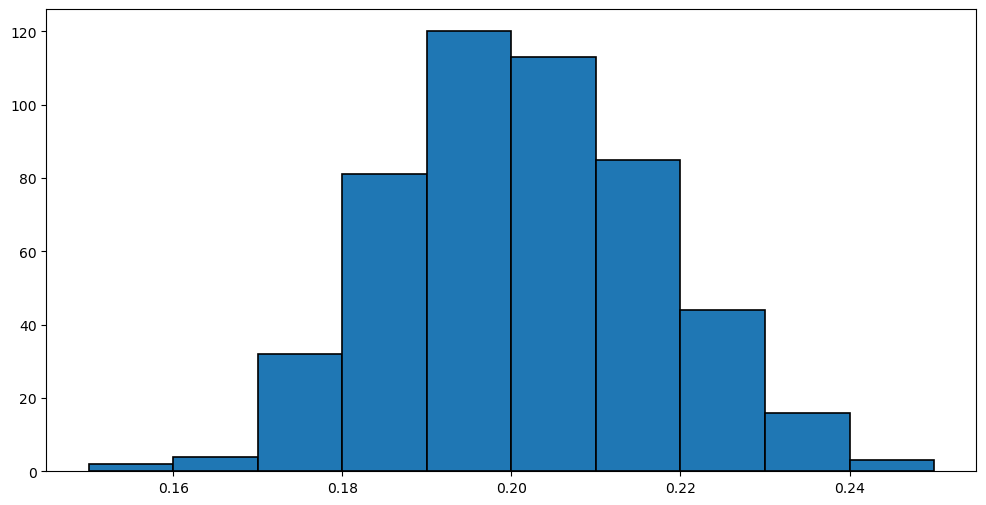

In [16]:
rmse = []
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    tree_reg = DecisionTreeRegressor(max_depth=3)
    tree_reg.fit(X_train, y_train)
    y_test_pred = tree_reg.predict(X_test)
    rmse.append(np.round(np.sqrt(mean_squared_error(y_test_pred.reshape(-1, 1), y_test)), 2))

plt.figure(figsize=(12, 6))
plt.hist(rmse, edgecolor='black', linewidth=1.2);

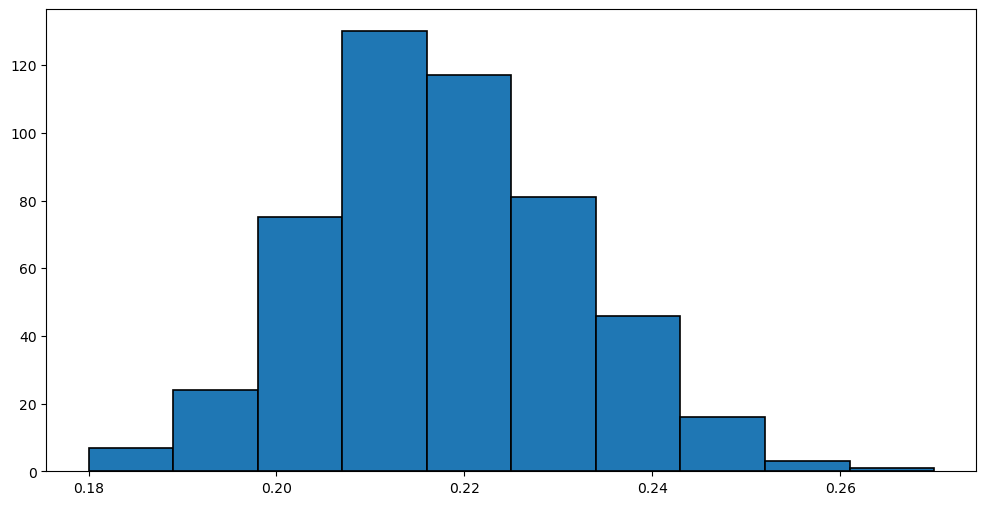

In [17]:
rmse = []
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    tree_reg = DecisionTreeRegressor(max_depth=1)
    tree_reg.fit(X_train, y_train)
    y_test_pred = tree_reg.predict(X_test)
    rmse.append(np.round(np.sqrt(mean_squared_error(y_test_pred.reshape(-1, 1), y_test)), 2))

plt.figure(figsize=(12, 6))
plt.hist(rmse, edgecolor='black', linewidth=1.2);

### Assessing a Model's Generalization Power -- Cont'd

* You don't want to use the test data until you have completed all your tests on parameterizing the model
  * You cannot use the test set for minimizing overfit since the model will learn to fit the test set

* To explore which models are best for the decision tree regressor, we can split the training set into:
  * a smaller training set: used to train the model
  * validation set: after the training (before the testing) to minimize overfitting 

### The Train / Validation / Test  Approach

* Train the decision tree regressor on the new, smaller training set

* Explore different parameters if needed 
  * Choose those perform best on the validation set
    
* Only use the test set to compare the decision tree regressor against other models
  * Choose the model with the smallest generalization error

### Shortcomings of the Train / Validation / Test  Approach


* Since statistical methods tend to perform worse when trained to learn complex model using fewer observations
  * Less data to learn the model 
  * Validation set error rate may tend to overestimate the test error rate


* Wastes another chunk of data (validation set), which cannot be used in training

* A good alternative to the training/validation/test is a method called K-fold cross-validation

### K-Fold Cross-Validation

<img src="images/cross_validation.png" alt="drawing" style="width:800px;"/>

### K-Fold Cross-Validation -- Cont'd

* Cross-validation is applied on the training set

* We use the following algorithm to train/validate using $K$-fold cross-validation
  * The training set is split into $K$ complementary chunks of data
  * We consider $K-1$ chunks as training and $1$ chunk as testing
  * We repeat the training/testing $K$ times and average the estimates (ex. RMSE) into a single cross-validation estimate

* Once we find the best model parameters, we then use them to train on the full training set

* It's common to use $K=10$ for cross-validation

### K-Fold Cross-Validation -- Cont'd

* Cross-validation is applied on the training set

* We use the following algorithm to train/validate using K-fold cross-validation
  * The training set is split into K complementary chunks of data
  * We consider K $-$ 1 chunks as training and 1 chunk as validation
  * We repeat the training/validation K times and average the estimates (ex. RMSE) into a single cross-validation estimate

* Once we find the best model parameters, we then use them to train on the full training set

* It's common to use K $=$ 10 for K-fold cross-validation

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)

tree_reg_rmse = np.sqrt(np.mean(-scores))

tree_reg_rmse

0.22435740270857488

In [19]:
tree_reg = DecisionTreeRegressor(max_depth=3)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_reg_rmse = np.sqrt(np.mean(-scores))

tree_reg_rmse

0.20013515993007866

### Scoring the K Data Chunks

* For scoring the K subsets, we used a function called "neg_mean_squared_error". This is simply:

$$ 
-1 \times MSE
$$

* The reason for this is that `cross_val_score` requires similarity function (as opposed to a distance function)
 * In MSE, the lower the score the better
 * In `cross_val_score` scoring scheme, the greater the score, the better the model

See link below for available scoring functions for regression:<br>
http://scikit-learn.org/stable/modules/model_evaluation.html

### Ensemble Methods: Random Forest Regressor

* Random Forests works by training many Decision Tree Regressors on random subsets of the features
  * Averaging out the predictions

* In general, the class of models wich work by averaging outcomes of a set of other models is called ensemble methods
  * Subsert of of ensemble machine learning
  
* Sometimes it’s useful to create a collection of similar (same algorithms) but different (using different features, data subsets or parameters), that provide different predictions. 
 * A policy (usually voting) is used to choose the “best” prediction

* In  scikit learn, an ensemble of estimators is wrapped into a single estimator
  * We can treat an ensemble just like any other estimator


### Ensemble Methods: Random Forest Regressor

<img src="https://raw.githubusercontent.com/blueberrymusic/Deep-Learning-A-Visual-Approach/main/Figures/Images/12-2.png" width="400">

### Random Forests and Bagging

* There are various ways to build ensembles
  * Two of the most common methods are bagging
* In boosting a subset the set of features to split on is selected randomly, without replacement
  * instead of considering all the features when computing the information gain, we select only a small subset of the features
  * The choice of subsets is repeated at every iteration
* It is also possible to bootstrap the data in a similar fashion to what we did previously



### Random Forests and Bagging -- Cont'd

<img src="https://raw.githubusercontent.com/blueberrymusic/Deep-Learning-A-Visual-Approach/main/Figures/Images/12-3.png" width=400>


In [20]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=50, max_depth=3, max_features=10)


### Radnom Forest Parameters


* The number of n_estimators in the  RandomForestRegressor defines the number of trees in the ensemble (forest)

* `max_features` is the maximum number of features to consider when looking for the best split


* The RandomForest Model yields a slightly lower error value than both the DecisionTreeRegressor and the LinearRegression models


In [21]:
scores = cross_val_score(forest_reg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)
forest_reg_rmse = np.sqrt(-scores)
forest_reg_rmse

array([0.18397591, 0.17096563, 0.18030235, 0.18025248, 0.13606847,
       0.20923208, 0.15561157, 0.15191385, 0.19537524, 0.18502949])

In [22]:
print ("score are %s\n" % forest_reg_rmse)
print ("mean score is %s"  % np.mean(forest_reg_rmse))


score are [0.18397591 0.17096563 0.18030235 0.18025248 0.13606847 0.20923208
 0.15561157 0.15191385 0.19537524 0.18502949]

mean score is 0.17487270755850212


### Using Grid Search for Finding Parameters That Minimize Loss

- Scikit-Learn offers GridSearchCV (Grid Search Cross-Validation)
  - Takes a list of parameters and some values and exhaustively tries the values using cross-validation


In [23]:
from sklearn.model_selection import GridSearchCV

grid_search_params = [{'n_estimators':[3, 9, 27, 50, 81], 'max_features': [2, 3, 4, 5, 7, 9, 11]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, 
                           param_grid=grid_search_params, 
                           cv=10, 
                           scoring = 'neg_mean_squared_error'
                          )

* The above search cases represent 35 different combination for `n_estimators` and `max_features`

 * Each of the tests is carried out using cros-validation with k=10

In [24]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4, 5, 7, 9, 11],
                          'n_estimators': [3, 9, 27, 50, 81]}],
             scoring='neg_mean_squared_error')

In [25]:
grid_search.best_params_

{'max_features': 9, 'n_estimators': 50}


- The best estimators was generated from `max_features = 3` and `n_estimators = 27`
- You can also see all the results for all the values passed

In [26]:
cv_scores = grid_search.cv_results_
for i in range(len(cv_scores['params'])):
    params, mean_score =  cv_scores['params'][i], cv_scores['mean_test_score'][i]
    print(params, np.sqrt(-mean_score))


{'max_features': 2, 'n_estimators': 3} 0.21559731933927237
{'max_features': 2, 'n_estimators': 9} 0.1962683927240083
{'max_features': 2, 'n_estimators': 27} 0.18536053822116394
{'max_features': 2, 'n_estimators': 50} 0.1771659171184057
{'max_features': 2, 'n_estimators': 81} 0.17766587781466942
{'max_features': 3, 'n_estimators': 3} 0.19126878466471614
{'max_features': 3, 'n_estimators': 9} 0.192656417293459
{'max_features': 3, 'n_estimators': 27} 0.1799685318791876
{'max_features': 3, 'n_estimators': 50} 0.17483396728308268
{'max_features': 3, 'n_estimators': 81} 0.17711337870967944
{'max_features': 4, 'n_estimators': 3} 0.2257205005397807
{'max_features': 4, 'n_estimators': 9} 0.18492627875449344
{'max_features': 4, 'n_estimators': 27} 0.18046787774425938
{'max_features': 4, 'n_estimators': 50} 0.17476350365606924
{'max_features': 4, 'n_estimators': 81} 0.17173422035953165
{'max_features': 5, 'n_estimators': 3} 0.1979588017696299
{'max_features': 5, 'n_estimators': 9} 0.1855474887839

In [27]:
grid_search.best_estimator_

RandomForestRegressor(max_features=9, n_estimators=50)

In [28]:
# Let's predict the new values using this best estimator found uisng the grid search

training_set_predictions_rand_forest = grid_search.best_estimator_.predict(X_train)

Text(0, 0.5, 'Measured  a1')

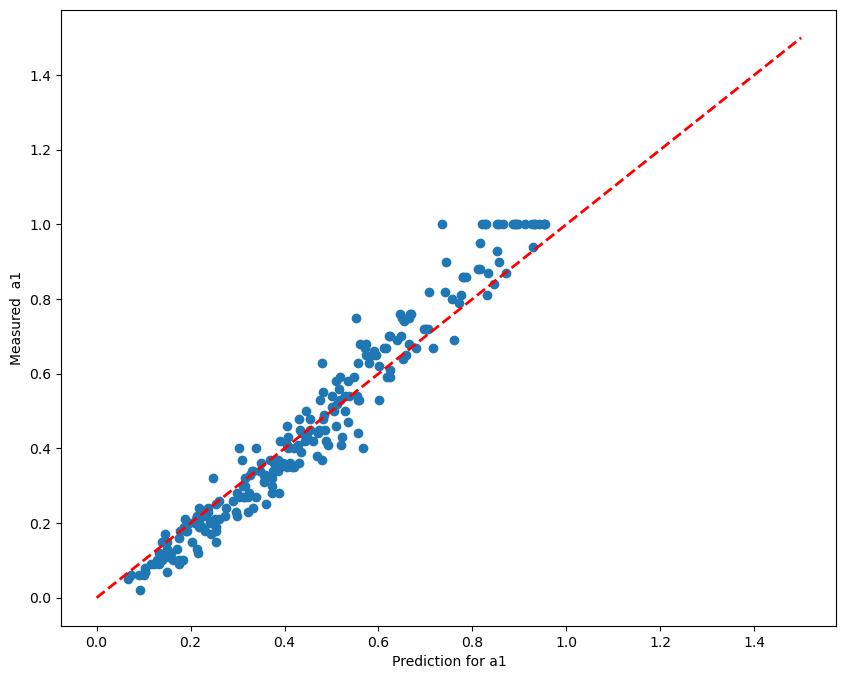

In [29]:
plt.figure(figsize=(10,8))

plt.scatter(training_set_predictions_rand_forest, y_train.values)
plt.plot(
    [0,1.5],
    [0,1.5],
    color='r', linewidth =2, linestyle = '--')

plt.xlabel("Prediction for a1")
plt.ylabel("Measured  a1")

### Testing

* Once we have tweaked all the parameters for all models, we can use the test data to compare the models' generalization performance
* The approach is the same as that followed above:
 * For each of model, we run the prediction on test data and compare the predicted with the observed values 
 * We select the model that makes the smallest error
* We determine whether the generalized performance is sufficient for our application
  - The performance requirements for a patient-facing application are perhaps not the same as those for an application for predicting algae blooms
* Not that in this approach, we are rewarding models that generalize well even if they are more complex 
 * We don't penalize complex models if they result in high generalization performance
 * Between models with relatively similar generalization performance, we need to choose the one with fewer parameters

### Testing

* Once we have tweaked all the parameters for all models, we can use the test data to compare the models' generalization performance
  * For each model, we run the prediction on test data and compare the predicted with the observed values 
  * We select the model that makes the smallest error
* We determine whether the generalized performance is sufficient for our application
  * Ex. The performance requirements for a patient-facing application are perhaps not the same as those for an application for predicting algae blooms
* Note that in this approach, we are rewarding models that generalize well even if they are more complex 
 * We don't penalize complex models if they result in high generalization performance
 * Between models with relatively similar generalization performance, we need to choose the one with fewer parameters